In [126]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [127]:
# 模拟调控N天，第1天无法用PID，从第2天开始施加PID调控
N = 10

# 每天目标预算
Budget_target = 100

# 每天实际花出预算
Budget_real = [0] * N
Budget_real[1] = 80

# 调控后每天预期预算
Budget_expected_positional = [0] * N
Budget_expected_incremental = [0] * N
Budget_expected_incremental_u = [0] * N

# PID系数
kp = 0.5
ki = 0.5
kd = 0.5

# 积分天数
T = 3

In [128]:
# 模拟每天实际花出预算，在目标预算和预期预算之间
def get_budget(Budget_min, Budget_max):
  return random.uniform(Budget_min, Budget_max)

In [129]:
# 位置型PID
def pid_positional(Budget_target, Budget_error):
  P = Budget_error[0]
  I = sum(Budget_error)
  D = Budget_error[0] - Budget_error[1]

  return kp * P + ki * I + kd * D

In [130]:
# 增量型PID
def pid_incremental(Budget_target, Budget_error, u):

  delta = kp * (Budget_error[0] - Budget_error[1]) + ki * Budget_error[0] + kd * (Budget_error[0] - 2 * Budget_error[1] + Budget_error[2])

  return delta + u


In [133]:
 # 第2天开始PID调控
for i in range(2, N):
  Budget_error = []
  for j in range(i-1, max(0, i-T), -1):
    Budget_error.append(Budget_target - Budget_real[j])
  if len(Budget_error) < T:
    Budget_error = Budget_error + [0] * (T - len(Budget_error))

  # 位置型PID
  Budget_expected_positional[i] = Budget_target + pid_positional(Budget_target, Budget_error)
  Budget_min = min(Budget_target, Budget_expected_positional[i])
  Budget_max = max(Budget_target, Budget_expected_positional[i])
  Budget_real[i] = get_budget(Budget_min, Budget_max)

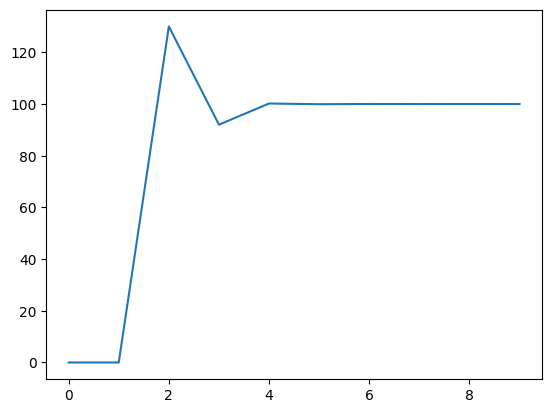

In [134]:
plt.plot([_ for _ in range(N)], Budget_expected_positional)


In [131]:
 # 第2天开始PID调控
for i in range(2, N):
  Budget_error = []
  for j in range(i-1, max(0, i-T), -1):
    Budget_error.append(Budget_target - Budget_real[j])
  if len(Budget_error) < T:
    Budget_error = Budget_error + [0] * (T - len(Budget_error))

  # 增量型PID
  Budget_expected_incremental_u[i] = pid_incremental(Budget_target, Budget_error, Budget_expected_incremental_u[i-1])
  Budget_expected_incremental[i] = Budget_target + Budget_expected_incremental_u[i]
  Budget_min = min(Budget_target, Budget_expected_incremental[i])
  Budget_max = max(Budget_target, Budget_expected_incremental[i])
  Budget_real[i] = get_budget(Budget_min, Budget_max)

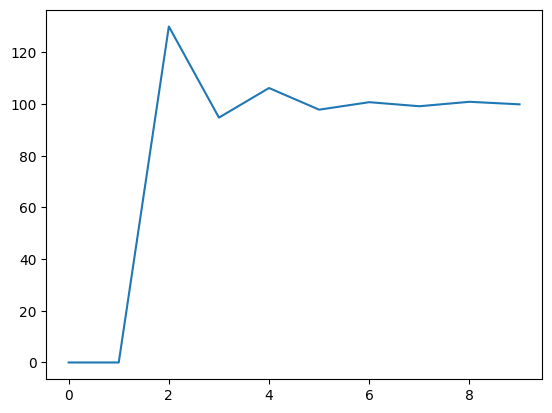

In [132]:
plt.plot([_ for _ in range(N)], Budget_expected_incremental)